In [1]:
identical_or_na =function(x) {
    tb = unique(na.omit(x))
    if (length(tb) == 0) return(NA)
    if(length(tb)!=1) warning(paste("Duplicate values:", paste(tb, collapse=",")))
    tb
}

In [2]:
library(tidyverse)
library(readxl)
options(readr.show_col_types=F)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
allfq = tibble(fq=readLines("fofq.txt")) %>%
    mutate(
        run=dirname(fq) %>% basename(),
        fname=basename(fq) %>%
            sub("_(il|R1|R2)(_001)?\\.(fastq|fq)(\\.gz)?", "", .) %>%
            sub("^novaseq_", "", .)
        ,
        sname = fname %>%
            sub("_S\\d+_L00[1-8]$", "", .) %>%
            sub("_S\\d+$", "", .) %>%
            sub("-(NextRAD|WGS)", "", .)
        ,
        read=case_when(
            grepl("_il.fastq.gz", fq) ~ "interleaved_uri",
            grepl("_R1(_001)?.fastq.gz", fq) ~ "read1_uri",
            grepl("_R2(_001)?.fastq.gz", fq) ~ "read2_uri",
        ),
    ) %>%
    filter(!grepl("^(NCT|[Bb]lank|neg)|_blank", fname))

In [4]:
hb_rhizo = allfq %>%
    filter(grepl("Rhizo_[1234]", run)) %>%
    transmute(sample=sname, species="Eucalptus melliodora",  meta_source="hb_rhizo") %>%
    glimpse()

Rows: 760
Columns: 3
$ sample      <chr> "GOL0025_1D_1", "GOL0025_1D_1", "GOL0025_1D", "GOL0025_1D"…
$ species     <chr> "Eucalptus melliodora", "Eucalptus melliodora", "Eucalptus…
$ meta_source <chr> "hb_rhizo", "hb_rhizo", "hb_rhizo", "hb_rhizo", "hb_rhizo"…


In [5]:
dieback = read_excel("input/Euc Dieback and Melaleuca metadata with indices_updated20230830.xlsx", na="NA") %>%
    janitor::clean_names() %>%
    filter(!if_all(everything(), is.na))

New names:
• `` -> `...5`
• `` -> `...7`
• `` -> `...8`
• `` -> `...10`
• `` -> `...11`
• `` -> `...13`
• `` -> `...14`
• `` -> `...16`
• `` -> `...28`


In [6]:
dieback_pre = dieback %>%
    transmute(
        meta_source="dieback",
        sample=sample_no,
        latitude,
        longitude,
        elevation,
        species,
        date=as.Date(date, origin="1899-12-30"),
        notes=note,
        seed,
    ) %>%
    glimpse()

Rows: 1,924
Columns: 9
$ meta_source <chr> "dieback", "dieback", "dieback", "dieback", "dieback", "di…
$ sample      <chr> "NCT", "MON0000", "MON0001", "MON0002", "MON0003", "MON000…
$ latitude    <dbl> NA, -37.13612, -37.13286, -37.13042, -37.14368, NA, -37.13…
$ longitude   <dbl> NA, 149.3636, 149.4232, 149.4340, 149.4330, NA, 149.3556, …
$ elevation   <dbl> NA, 0, 0, 0, 0, NA, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ species     <chr> NA, "E. radiata", "E. viminalis", "E. dives", "E. dives", …
$ date        <date> NA, 2019-12-10, 2019-12-10, 2019-12-10, 2019-12-10, NA, 2…
$ notes       <chr> NA, "Imlay Rd 50.5 km from ?", "Imlay Rd 48km from ?", "Im…
$ seed        <chr> NA, "Yes", "Yes", "Yes", "Yes", NA, "Yes", "Yes", "Yes", "…


In [7]:
neweng = read_csv("input/Maid_meta_bio_tags.csv") %>%
    janitor::clean_names() %>%
    filter(is.na(no_out)) %>%
    transmute(
        sample, species=species_x, latitude, longitude, location, notes, date=lubridate::as_date(lubridate::dmy_hm(parsed_date)),
        meta_source="neweng", 
    ) %>%
    glimpse()

New names:
• `` -> `...1`


Rows: 189
Columns: 8
$ sample      <chr> "DDA123e", "DDA123j", "DDA129", "DDA123b", "DDA123d", "DDA…
$ species     <chr> "Eucalyptus canobolensis", "Eucalyptus canobolensis", "Euc…
$ latitude    <dbl> -33.35989, -33.35989, -33.33897, -33.35989, -33.35989, -33…
$ longitude   <dbl> 148.9730, 148.9730, 149.0061, 148.9730, 148.9730, 148.9770…
$ location    <chr> "c. 350m west from Mt Towac track, Mt Canobolas.", "c. 350…
$ notes       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ date        <date> 2019-11-03, 2019-11-03, 2019-11-04, 2019-11-03, 2019-11-0…
$ meta_source <chr> "neweng", "neweng", "neweng", "neweng", "neweng", "neweng"…


In [8]:
dp15_meta = read_tsv("input/sample-metadata.tsv") %>%
    unique() %>%
    glimpse()

Rows: 1,746
Columns: 14
$ sample      <chr> "FDK10", "Gund15", "Gund16", "Gund21", "Gund22", "Gund23",…
$ species     <chr> "Eucalyptus microcarpa", "Eucalyptus albens x sideroxylon"…
$ date        <chr> "2013-10-31T00:00:00Z", "2014-05-29T03:28:41Z", "2014-05-2…
$ parsed_date <dttm> 2013-10-31 00:00:00, 2014-05-29 03:28:41, 2014-05-29 03:2…
$ latitude    <dbl> -36.33119, -34.98254, -34.98273, -34.98324, -34.98335, -34…
$ longitude   <dbl> 145.7069, 148.1257, 148.1252, 148.1232, 148.1233, 148.1231…
$ elevation   <dbl> 153, 253, 259, 279, 281, 285, 275, 268, 430, 408, 681, 670…
$ datum       <chr> "WGS84", "WGS84", "WGS84", "WGS84", "WGS84", "WGS84", "WGS…
$ location    <chr> "Dookie (private property)", "Leonard's Road, Coolac (priv…
$ collectors  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ samplename  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ population  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ seed        <c

This is needed as we have a few duplicates for the CCAs. The below horrible filter statement picks the most data complete ones (remove it to see)

In [9]:
dp15_meta_pre = dp15_meta %>%
    group_by(sample) %>%
    mutate(n=n()) %>%
    ungroup() %>%
    arrange(sample)  %>%
    filter(n==1 | (n != 1  & is.na(samplename))) %>%
    mutate(
        meta_source="dp15",
        date=sub("T.*", "", date) %>% as.Date(),
    ) %>%
    select(-n, -parsed_date, -samplename) %>%
    glimpse() 

Rows: 1,716
Columns: 13
$ sample      <chr> "Angophora_floribunda_ANU_Banks_Building", "CCA0003", "CCA…
$ species     <chr> "Angophora floribunda", "Eucalyptus mannensis subsp. manne…
$ date        <date> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ latitude    <dbl> NA, NA, -29.36972, -30.83028, -30.83028, -33.04611, -38.41…
$ longitude   <dbl> NA, NA, 130.0492, 116.6392, 116.6392, 121.1722, 143.9333, …
$ elevation   <dbl> NA, NA, 242, 320, 320, 215, 364, 1080, 320, 735, 71, 237, …
$ datum       <chr> NA, NA, "WGS84", "WGS84", "WGS84", "WGS84", "WGS84", "WGS8…
$ location    <chr> "ANU Banks Building", NA, "West of Vokes Hill to Cook Road…
$ collectors  <chr> NA, "Dean Nicolle", "Dean Nicolle", "Dean Nicolle", "Dean …
$ population  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ seed        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ notes       <chr> NA, NA, "elevation computed from api.geonames.org/astergde…
$ meta_source <c

In [10]:
cca_pre = read_excel("input/CCATreesCombinedMetadata_ash.xlsx", na = "NA", guess_max = 100000) %>%
    janitor::clean_names() %>%
    transmute(
        sample=field_id,
        species=current_name,
        location,
        latitude,
        longitude, 
        date = as.Date(date),
        notes = field_comments,
        meta_source="cca",
    ) %>%
    glimpse()

Rows: 6,098
Columns: 8
$ sample      <chr> "CCA0001", "CCA0002", "CCA0003", "CCA0004", "CCA0005", "CC…
$ species     <chr> "Eucalyptus leptopoda subsp. elevata", "Eucalyptus leptopo…
$ location    <chr> "40 km east of Neale Junction, Western Australia.", "40 km…
$ latitude    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ longitude   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ date        <date> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ notes       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ meta_source <chr> "cca", "cca", "cca", "cca", "cca", "cca", "cca", "cca", "c…


In [11]:
jz = readxl::read_excel("input/JZ metadata_jan24.xlsx") %>%
    transmute(
        sample=name,
        species=species,
        location=site,
        latitude,
        longitude,
        elevation,
        meta_source="JZ",
    ) %>%
    glimpse()

New names:
• `` -> `...14`
• `` -> `...15`
• `` -> `...17`
• `` -> `...18`


Rows: 192
Columns: 7
$ sample      <chr> "JAZ_83", "DC_2030", "JAZ_54c", "JAZ_23", "JAZ_47a", "JAZ_…
$ species     <chr> "E bridgesiana", "E nova-anglica", "E nova-anglica", "E no…
$ location    <chr> "NEWH01", "HORT01", "WAND01", "HELE01", "LAUR01", "TOMG02"…
$ latitude    <dbl> -30.43353, -30.33085, -30.00786, -30.51457, -30.17244, -30…
$ longitude   <dbl> 151.6649, 150.2729, 151.4809, 151.9926, 151.6151, 151.6115…
$ elevation   <dbl> NA, 930, 1131, 1010, 1260, 1300, 970, 1205, 1404, 890, 105…
$ meta_source <chr> "JZ", "JZ", "JZ", "JZ", "JZ", "JZ", "JZ", "JZ", "JZ", "JZ"…


In [12]:
rrg = readxl::read_excel("input/RRG_metadata_2_jan24.xlsx") %>%
    transmute(
        sample=Sample_ID,
        location=Location,
        latitude=Lat,
        longitude=Long,
        elevation=Elevation,
        meta_source="RRG",
    ) %>%
    glimpse()

New names:
• `` -> `...14`
• `` -> `...15`


Rows: 192
Columns: 6
$ sample      <chr> "AY_01", "AY_02", "AY_03", "AY_04", "AY_05", "AY_06", "AY_…
$ location    <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Albury"…
$ latitude    <dbl> -36.10000, -36.10000, -36.10000, -36.10000, -36.10000, -36…
$ longitude   <dbl> 146.8833, 146.8833, 146.8833, 146.8833, 146.8833, 146.8833…
$ elevation   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5…
$ meta_source <chr> "RRG", "RRG", "RRG", "RRG", "RRG", "RRG", "RRG", "RRG", "R…


In [13]:
all_eucs =  bind_rows(dp15_meta_pre, dieback_pre, neweng, jz, rrg, hb_rhizo) %>%
    mutate_if(is.character, utf8::utf8_encode) %>%
    mutate(
        parsed_date = case_when(
            !is.na(as.numeric(date)) ~ as.Date(as.numeric(date), origin = "1899-12-30"),
            grepl("\\d{2}-(JAN|FEB|MAR|APR|MAY|JUN|JUL|AUG|SEP|OCT|NOV|DEC)-\\d+", date, perl=T) ~ lubridate::dmy(sub(" .+", "", date)),
            grepl("T.+Z", date) ~ lubridate::ymd(sub("T.+Z", "", date)),
            grepl("\\d+/\\d+/\\d{4}", date) ~ lubridate::dmy(date),
            
        ),
        latitude=ifelse(latitude==0, NA, latitude),
        longitude=ifelse(longitude==0, NA, longitude),
        species=ifelse(species=="0", NA_character_, species),
        species=sub("E\\.? ", "Eucalyptus ", species, fixed=T),
        errors = case_when(
            is.na(species) ~ "no_species",
            is.na(latitude) & is.na(longitude) ~ "no_latlong",
            !(latitude > -44 & latitude < -10 & longitude > 110 & longitude < 155) ~ "latlong_not_in_australia",
            T ~ NA_character_,
        ),
    )

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `parsed_date = case_when(...)`.
Caused by warning:
!  1170 failed to parse.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


In [14]:
write_tsv(all_eucs, "all_euc_sample_metadata.tsv", na="")

# Plots

Warning message in geom_map(aes(long, lat, group = group, map_id = region), data = aus, :
“Ignoring unknown aesthetics: x and y”
Warning message:
“Removed 1804 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1804 rows containing missing values (`geom_point()`).”


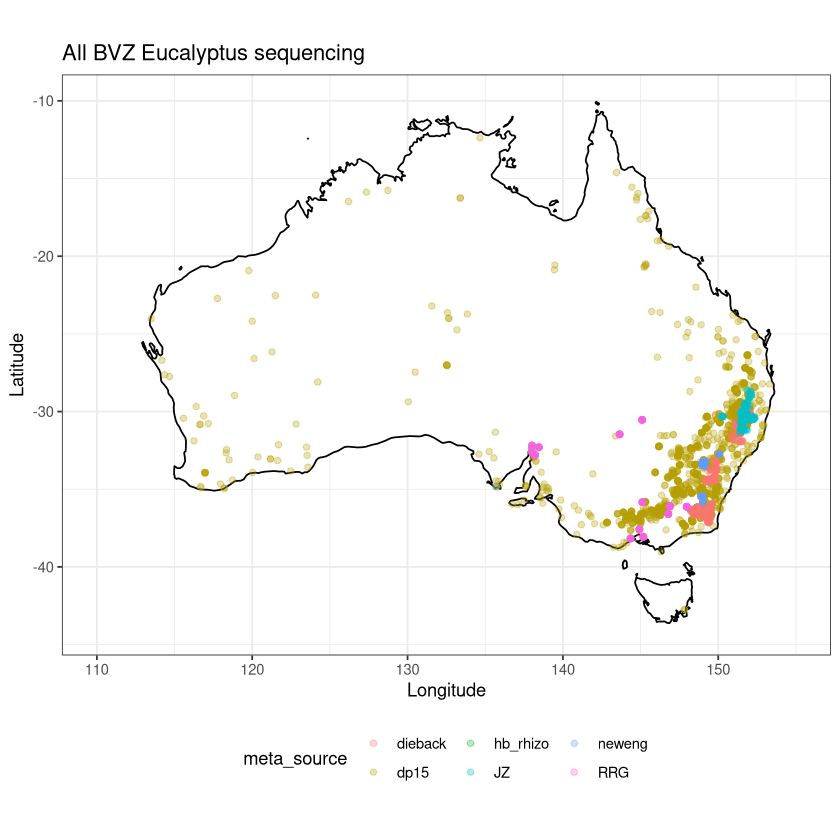

In [15]:
aus = map_data("world", "Australia")
all_eucs %>%
    rename(lat=latitude, long=longitude) %>%
ggplot(aes(long, lat)) +
    geom_map(aes(long, lat, group=group, map_id=region), data=aus, map=aus, colour="black", fill="white") + 
    geom_point(aes(colour=meta_source), alpha=0.3) +
    xlim(c(110, 155)) +
    ylim(c(-44, -10)) +
    labs(title="All BVZ Eucalyptus sequencing", x="Longitude", y="Latitude") + 
    coord_fixed() +
    theme_bw() +
    theme(legend.position="bottom")
#ggsave("map.svg", width=8, height=8)
ggsave("map.png", width=8, height=8, dpi=600)

In [16]:
meta = all_eucs %>%
    filter(!grepl("^NCT|[Bb]lank", sample)) %>%
    group_by(sample) %>%
    reframe(across(!any_of("meta_source"), identical_or_na), meta_source=paste(unique(meta_source), collapse=";")) %>%
    add_count(sample) %>%
    glimpse()
#    filter(n>1)

Rows: 4,392
Columns: 16
$ sample      <chr> "1", "10", "1001", "1004", "1007", "101", "1010", "1012", …
$ species     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ date        <date> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ latitude    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ longitude   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ elevation   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ datum       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ location    <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ collectors  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ population  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ seed        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ notes       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ parsed_date <d

In [17]:
corr =read_tsv("manual_corrections.csv")
allfq = allfq %>%
    rows_update(corr, by = "fname", unmatched="ignore")

In [18]:
full = meta %>%
    mutate(has_meta=T) %>%
    full_join(allfq, by=join_by(sample==sname))#, relationship="one-to-many") 

In [19]:
meta %>%
    count(sample) %>%
    filter(n>1)

sample,n
<chr>,<int>


In [20]:
complete_meta = full %>%
    filter(!is.na(has_meta), !is.na(fq)) %>%
    glimpse()

Rows: 10,553
Columns: 21
$ sample      <chr> "AY_01", "AY_01", "AY_01", "AY_01", "AY_02", "AY_02", "AY_…
$ species     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ date        <date> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ latitude    <dbl> -36.1, -36.1, -36.1, -36.1, -36.1, -36.1, -36.1, -36.1, -3…
$ longitude   <dbl> 146.8833, 146.8833, 146.8833, 146.8833, 146.8833, 146.8833…
$ elevation   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ datum       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ location    <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Albury"…
$ collectors  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ population  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ seed        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ notes       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ parsed_date <

In [21]:
write_tsv(complete_meta, "complete_meta.tsv", na="")

In [22]:
rl2s = complete_meta %>%
    glimpse() %>%
    transmute(
        sample, project=meta_source, species, library=fname, run, read, fq
    ) %>%
    #dplyr::group_by(sample, project, species, library, run, read) %>%
    #dplyr::mutate(library=case_when(
    #    n()>1 ~ sprintf("%s_techrep%d", library, 1:n()),
    #    T ~ library,
    #))%>%
    pivot_wider(values_from="fq", names_from="read")  %>%
    write_tsv("rl2s.tsv", na="")

Rows: 10,553
Columns: 21
$ sample      <chr> "AY_01", "AY_01", "AY_01", "AY_01", "AY_02", "AY_02", "AY_…
$ species     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ date        <date> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ latitude    <dbl> -36.1, -36.1, -36.1, -36.1, -36.1, -36.1, -36.1, -36.1, -3…
$ longitude   <dbl> 146.8833, 146.8833, 146.8833, 146.8833, 146.8833, 146.8833…
$ elevation   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ datum       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ location    <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Albury"…
$ collectors  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ population  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ seed        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ notes       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ parsed_date <

# samplesets

In [29]:
rl2s %>%
    filter(grepl("melliodora|sideroxylon", species, perl=T))  %>%
    pull(sample) %>%
    unique() %>%
    sort() %>%
    writeLines("melsider.txt")

In [23]:
hbdecra = readLines("samplesets/HBDecra.txt") 

Warning message in file(con, "r"):
“cannot open file 'samplesets/HBDecra.txt': No such file or directory”


ERROR: Error in file(con, "r"): cannot open the connection


In [ ]:
hbdecra[(hbdecra%in%rl2s$sample)] %>% writeLines("samplesets/HBDecra_testing.txt")

# mapping to fastq